## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [488]:
# Your code here - remember to use markdown cells for comments as well
import pandas as pd
import numpy as np
from sklearn import linear_model

In [533]:
df = pd.read_csv("data/kc_house_data.csv")
len(df)

21597

## Thoughts on the Data
 - Bedrooms has 33 rooms at the max.
 - Bathrooms has 8 at the max.
 - Both of these are significant deviations from the mean.
 - There is a significant outlier somewhere based on the max row.

In [497]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [449]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [450]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [451]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [501]:
list(df.isna().value_counts())

[15762, 3402, 1942, 428, 47, 10, 4, 2]

In [505]:
df.columns[df.isna().any()].tolist()

['waterfront', 'view', 'yr_renovated']

In [504]:
df.loc[:, df.isna().any()]

,waterfront,view,yr_renovated
0,NaN,NONE,0.0
1,NO,NONE,1991.0
2,NO,NONE,NaN
3,NO,NONE,0.0
4,NO,NONE,0.0
...,...,...,...
21592,NO,NONE,0.0
21593,NO,NONE,0.0
21594,NO,NONE,0.0
21595,NaN,NONE,0.0


In [509]:
missing_cols, missing_rows = (
    (df.isnull().sum(x) | df.eq('').sum(x))
    .loc[lambda x: x.gt(0)].index
    for x in (0, 1)
)

In [511]:
df.loc[missing_rows, missing_cols]

,waterfront,view,yr_renovated
0,NaN,NONE,0.0
2,NO,NONE,NaN
7,NO,NaN,0.0
10,NaN,NONE,0.0
12,NO,NONE,NaN
...,...,...,...
21583,NO,NONE,NaN
21586,NaN,NONE,0.0
21587,NaN,NONE,0.0
21589,NO,NaN,0.0


In [516]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [519]:
df = df.drop(columns=['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])

In [528]:
df['waterfront'] = df['waterfront'].fillna('NO')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Bath_SQFTL
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1955,1180.000000
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,1142.222222
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,770.000000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,653.333333
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,840.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009,612.000000
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014,924.000000
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009,1360.000000
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NO,Average,8 Good,2004,640.000000


In [529]:
df['waterfront'].value_counts()

NO    21597
Name: waterfront, dtype: int64

In [530]:
df['waterfront'] = df['waterfront'].map({'YES': 1, 'NO': 0})

In [531]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Bath_SQFTL
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,1955,1180.000000
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,1951,1142.222222
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,Average,6 Low Average,1933,770.000000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,Very Good,7 Average,1965,653.333333
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,Average,8 Good,1987,840.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,Average,8 Good,2009,612.000000
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,Average,8 Good,2014,924.000000
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,Average,7 Average,2009,1360.000000
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,Average,8 Good,2004,640.000000


In [532]:
df['waterfront'].value_counts()

0    21597
Name: waterfront, dtype: int64

In [463]:
df.loc[df['grade']== '8 Good'].head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,Average,8 Good,1987
10,1736800520,662500.0,3,2.50,3560,9796,1.0,0,Average,8 Good,1965
22,7137970340,285000.0,5,2.50,2270,6300,2.0,0,Average,8 Good,1995
24,3814700200,329000.0,3,2.25,2450,6500,2.0,0,Good,8 Good,1985
26,1794500383,937000.0,3,1.75,2450,2691,2.0,0,Average,8 Good,1915


In [464]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [465]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [466]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,Average,8 Good,1987


In [467]:
grade_replace = {'3 Poor': 0, '4 Low': 1, '5 Fair': 2, '6 Low Average': 3, '7 Average': 4, 
                '8 Good': 5, '9 Better': 6, '10 Very Good': 7, '11 Excellent': 8, '12 Luxury': 9,
                '13 Mansion': 10}

df["grade"].replace(grade_replace, inplace=True)

In [468]:
df['grade'].value_counts()

4     8974
5     6065
6     2615
3     2038
7     1134
8      399
2      242
9       89
1       27
10      13
0        1
Name: grade, dtype: int64

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1

In [469]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,Average,4,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,Average,4,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,Average,3,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,Very Good,4,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,Average,5,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,Average,5,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,Average,5,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,Average,4,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,Average,5,2004


In [470]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [471]:
grade_replace1 = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}

df["condition"].replace(grade_replace1, inplace=True)

In [472]:
df['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

In [473]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,2,4,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,2,4,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,2,3,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,4,4,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,2,5,1987


In [474]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,2,4,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,2,4,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,2,3,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,4,4,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,2,5,1987


In [475]:
df['Price_sqft'] = df['price'] / df['sqft_living']

In [517]:
df['Bath_SQFTL'] = df['sqft_living'] / df['bathrooms']

# Finished Data

In [518]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Bath_SQFTL
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1180.000000
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1142.222222
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,770.000000
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,653.333333
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,840.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,612.000000
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,924.000000
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,1360.000000
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,640.000000


In [480]:
from sklearn.model_selection import train_test_split

In [477]:
len(df)

21597

In [478]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

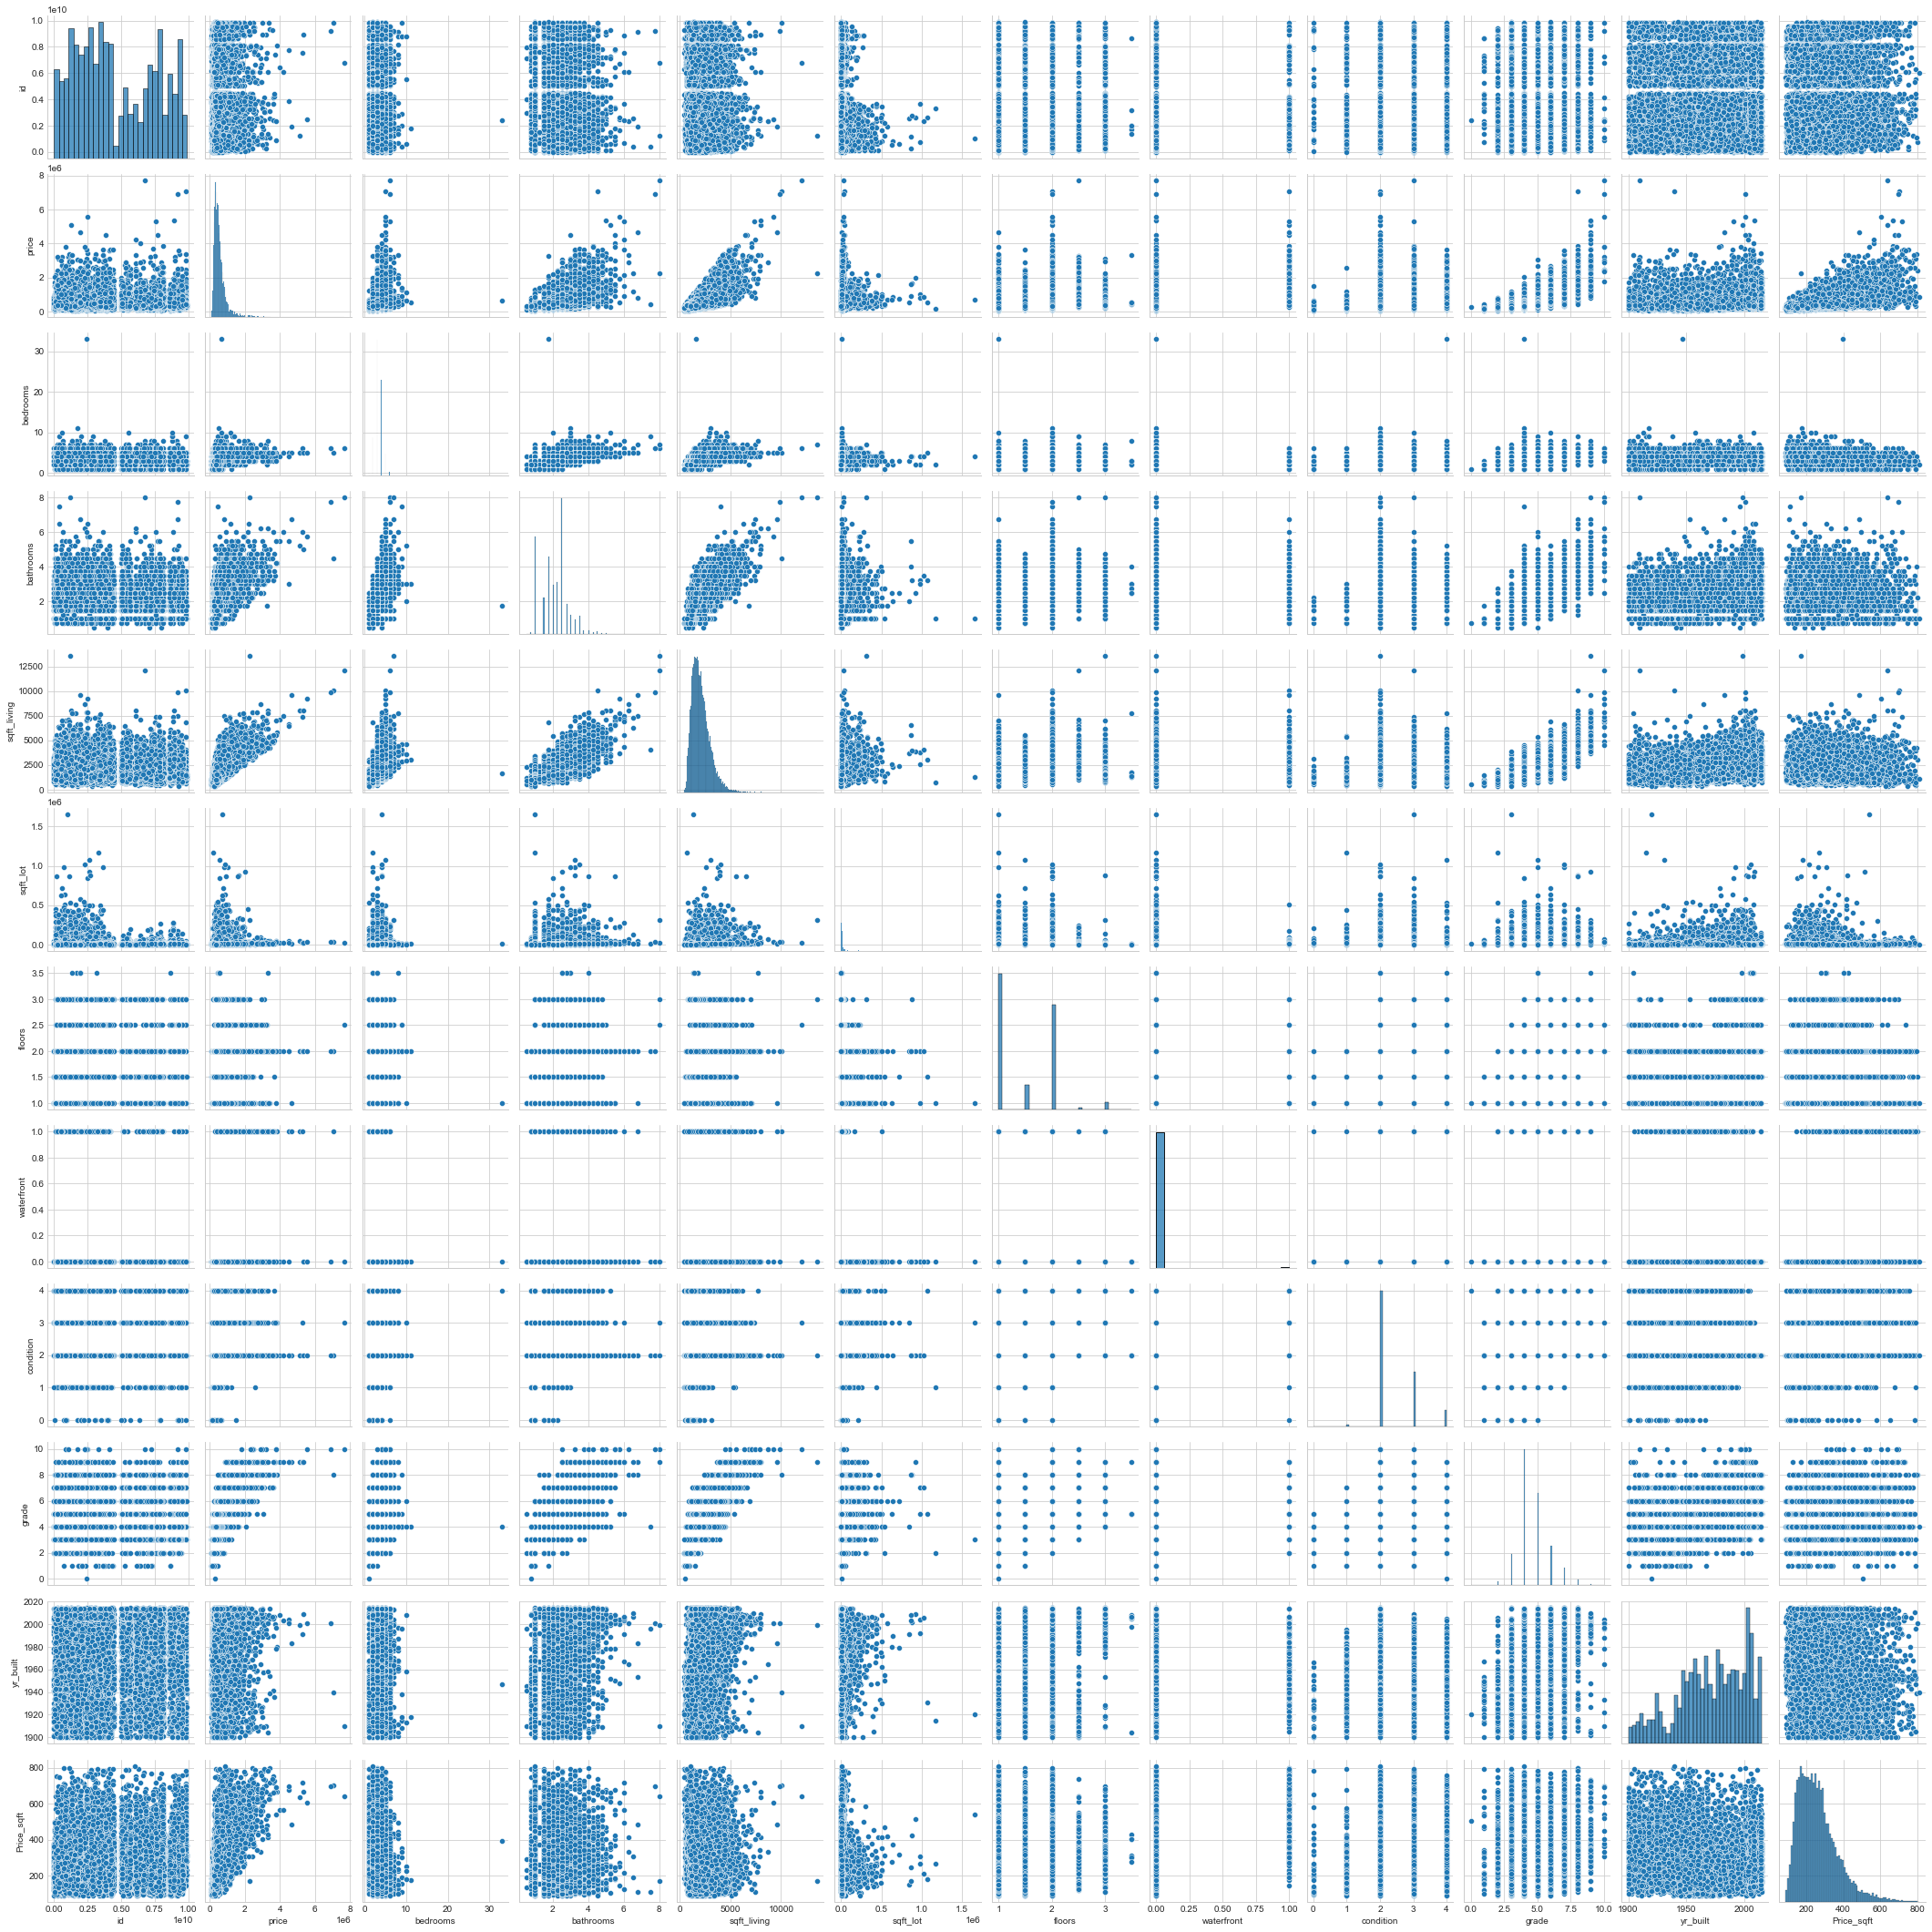

In [479]:
sb.pairplot(df)
plt.savefig('pairplor.png')

## Price per SQFT

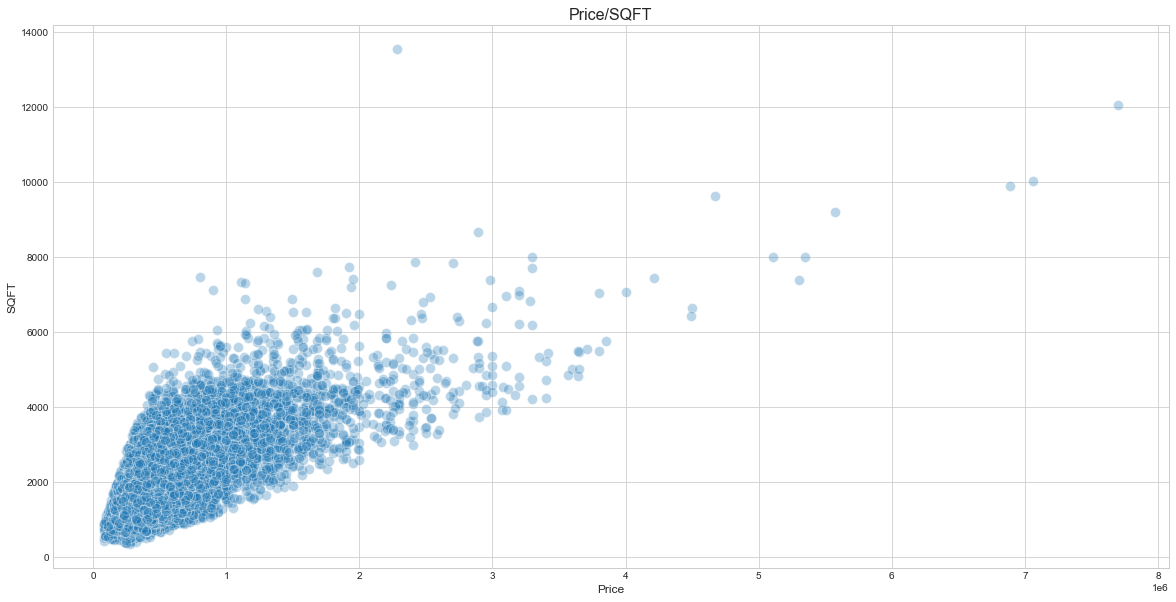

In [265]:
plt.scatter(x = 'price', y = 'sqft_living', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Price/SQFT', fontsize = 16)
plt.ylabel('SQFT', fontsize = 12)
plt.xlabel('Price', fontsize = 12)

plt.savefig('Price_Comp.png')

In [172]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'Price_sqft'],
      dtype='object')

## Price per Bedroom

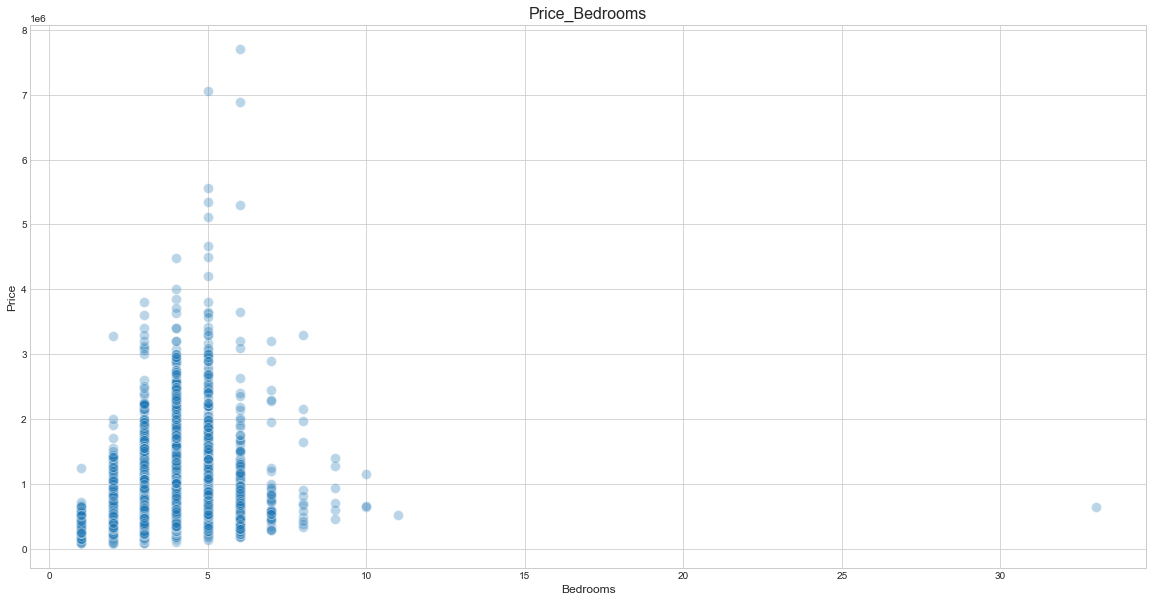

In [174]:
plt.scatter(x = 'bedrooms', y = 'price', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Price_Bedrooms', fontsize = 16)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Bedrooms', fontsize = 12)

plt.savefig('Price_Bed.png')

## Price per Year Built

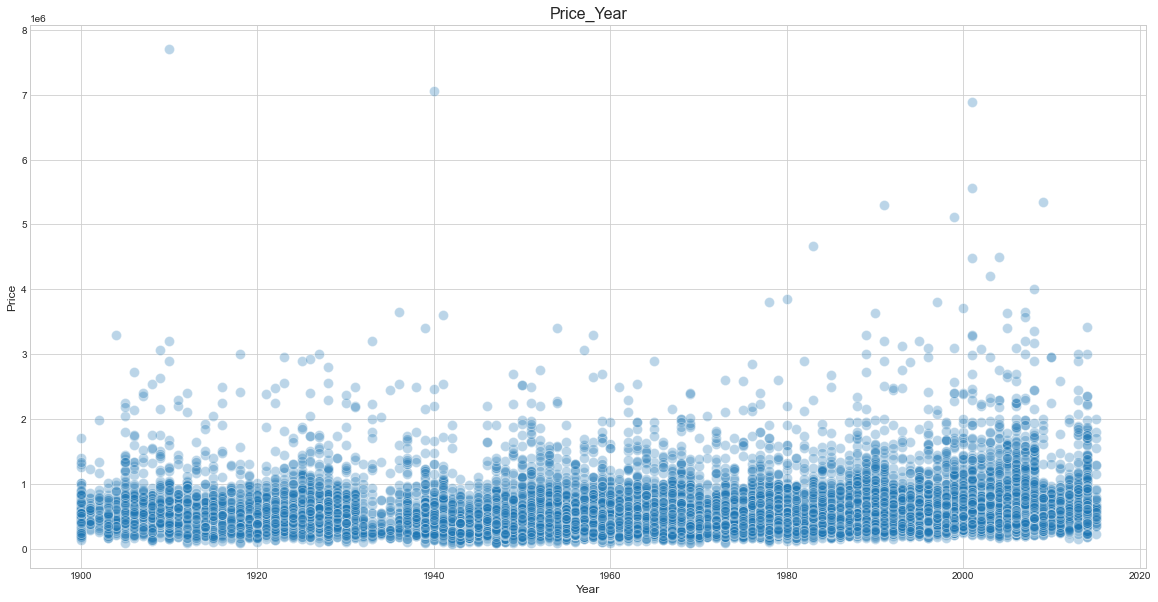

In [175]:
plt.scatter(x = 'yr_built', y = 'price', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Price_Year', fontsize = 16)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Year', fontsize = 12)

plt.savefig('Price_Year.png')

## Price Based on Bedroom Count

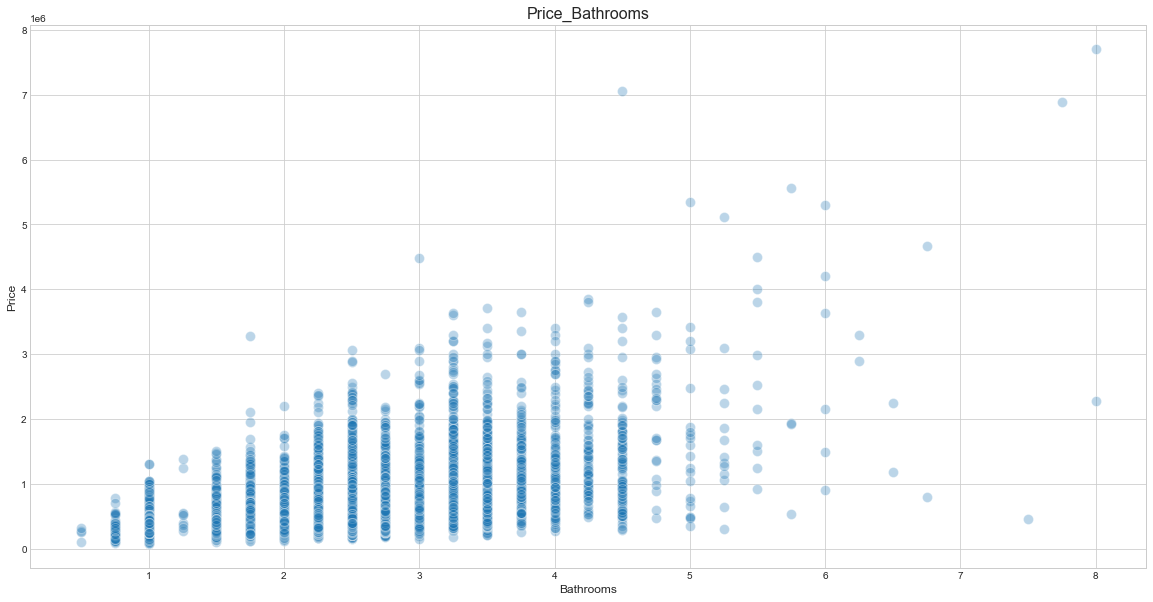

In [176]:
plt.scatter(x = 'bathrooms', y = 'price', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Price_Bathrooms', fontsize = 16)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Bathrooms', fontsize = 12)

plt.savefig('Price_Bath.png')

## Price per SQFT of Living Space
 - The first possible linear relationship.

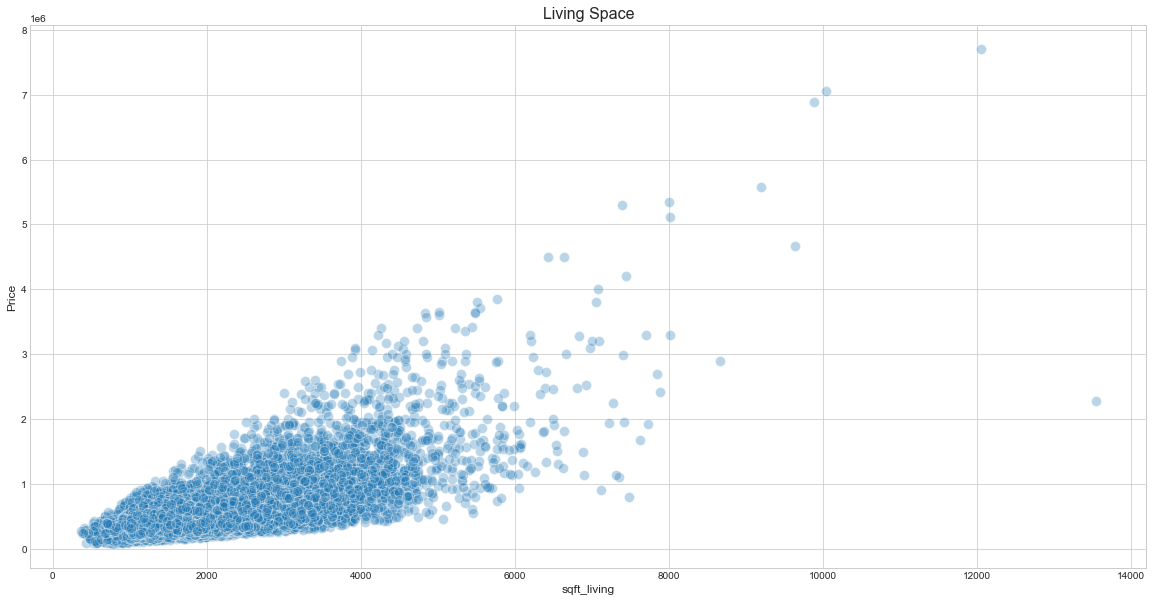

In [177]:
plt.scatter(x = 'sqft_living', y = 'price', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Living Space', fontsize = 16)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('sqft_living', fontsize = 12)

plt.savefig('Price_Living.png')

In [434]:
X_var = df[['sqft_living', 'bedrooms', 'bathrooms']]
y_var = df['price']

In [435]:
import statsmodels.api as sm
from termcolor import colored as cl

slr_model = sm.OLS(y_var, X_var)
slr_reg = slr_model.fit()

In [436]:
print(slr_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                          3.872e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                        0.00
Time:                        10:01:46   Log-Likelihood:                     -2.9981e+05
No. Observations:               21597   AIC:                                  5.996e+05
Df Residuals:                   21594   BIC:                                  5.997e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [481]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

ValueError: operands could not be broadcast together with shapes (3,) (21597,) 

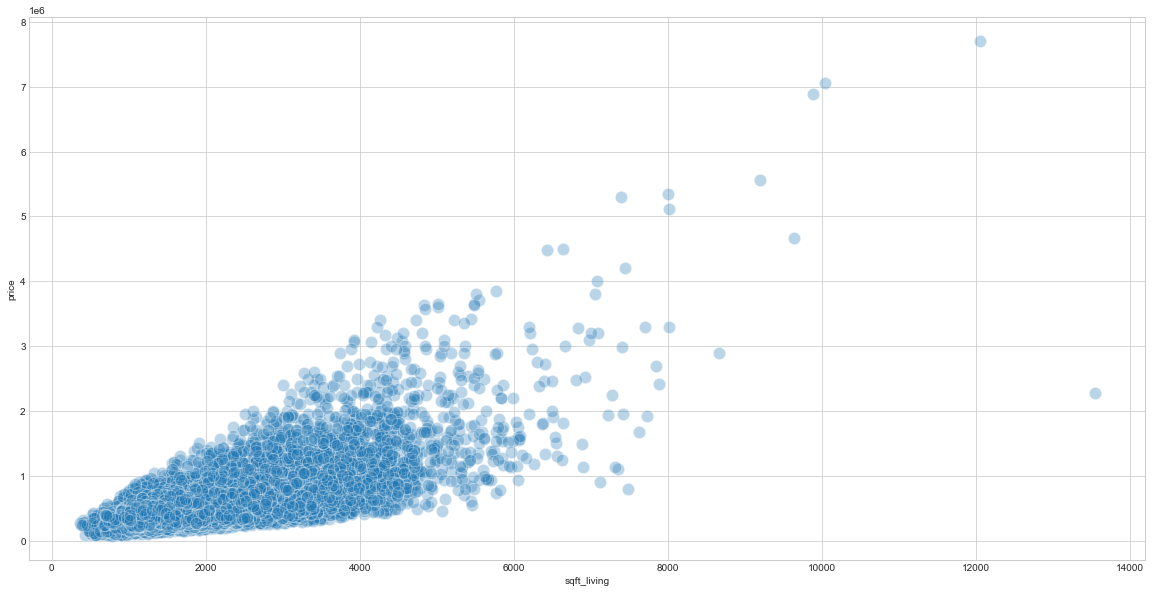

In [482]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'sqft_living', y = 'price', data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['sqft_living'], slr_slope*df['sqft_living'] + slr_intercept, color = 'r', linewidth = 3)
plt.title('Price Per SQFT Living', fontsize = 16)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('SQFT Living Space', fontsize = 12)

plt.savefig('price_sqft_living_fit.png')

In [439]:
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

R-Squared : 0.5017772155839054


In [194]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'Price_sqft'],
      dtype='object')

## Price Based on Year Built

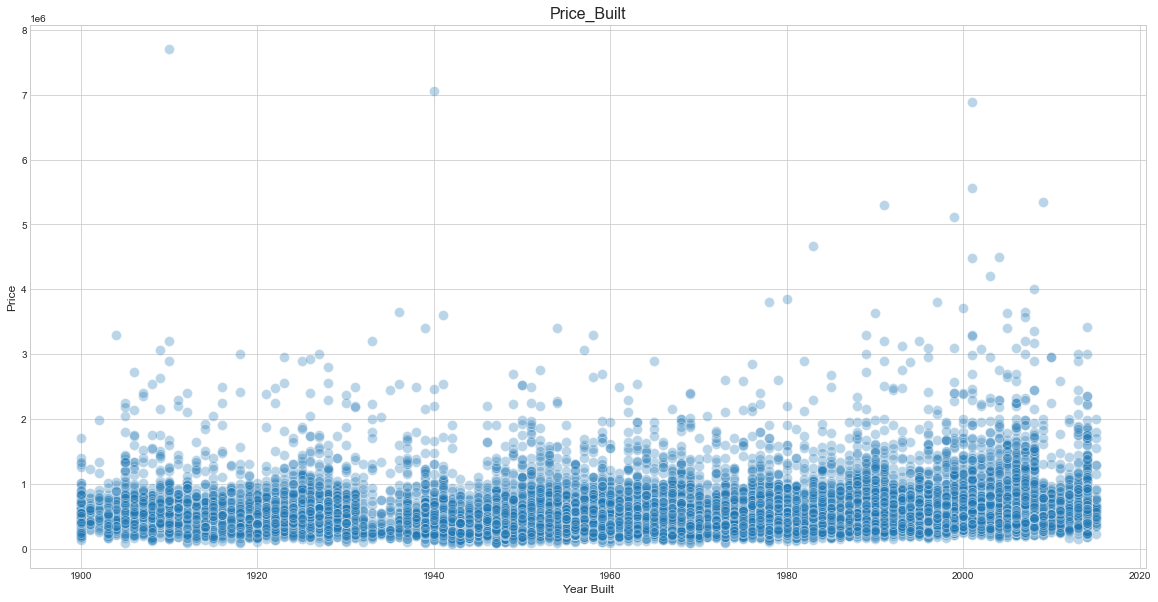

In [195]:
plt.scatter(x = 'yr_built', y = 'price', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Price_Built', fontsize = 16)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Year Built', fontsize = 12)

plt.savefig('Price_Built.png')

## Price per SQFT Living Space

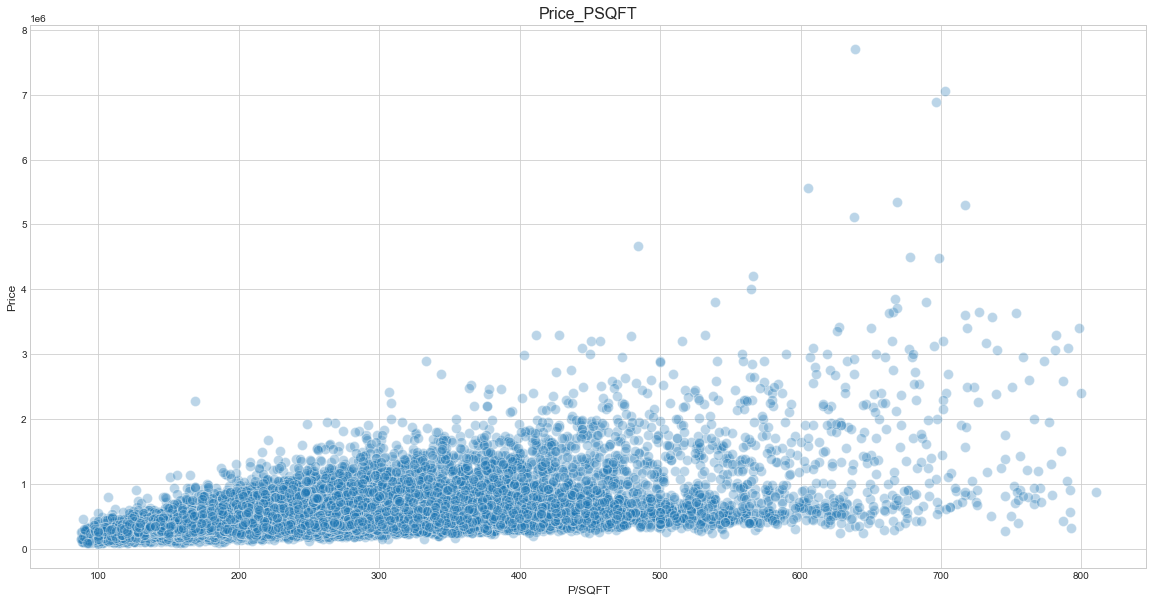

In [199]:
plt.scatter(x = 'Price_sqft', y = 'price', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Price_PSQFT', fontsize = 16)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('P/SQFT', fontsize = 12)

plt.savefig('Price_PSQFT.png')

## Price per Floors

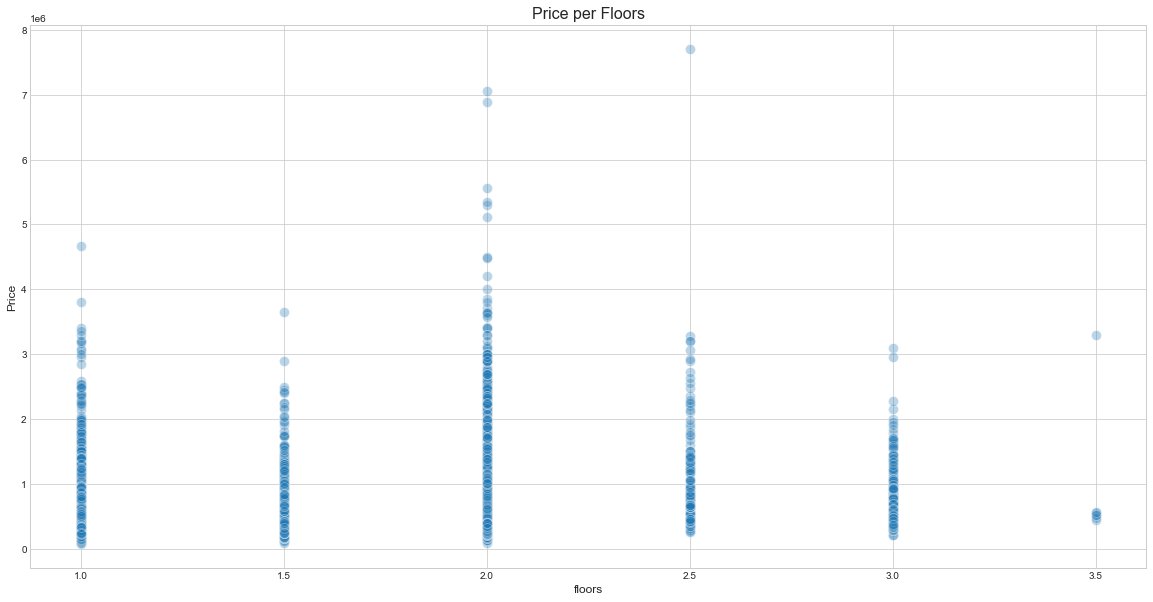

In [200]:
plt.scatter(x = 'floors', y = 'price', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Price per Floors', fontsize = 16)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('floors', fontsize = 12)

plt.savefig('Price_Floors.png')

In [201]:
X_var = df[['floors']]
y_var = df['price']

In [202]:
slr_model1 = sm.OLS(y_var, X_var)
slr_reg1 = slr_model1.fit()

In [203]:
print(cl(slr_reg1.summary(),attrs = ['bold']))

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.684
Method:                 Least Squares   F-statistic:                          4.667e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                        0.00
Time:                        07:04:02   Log-Likelihood:                     -3.0740e+05
No. Observations:               21597   AIC:                                  6.148e+05
Df Residuals:                   21596   BIC:                                  6.148e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

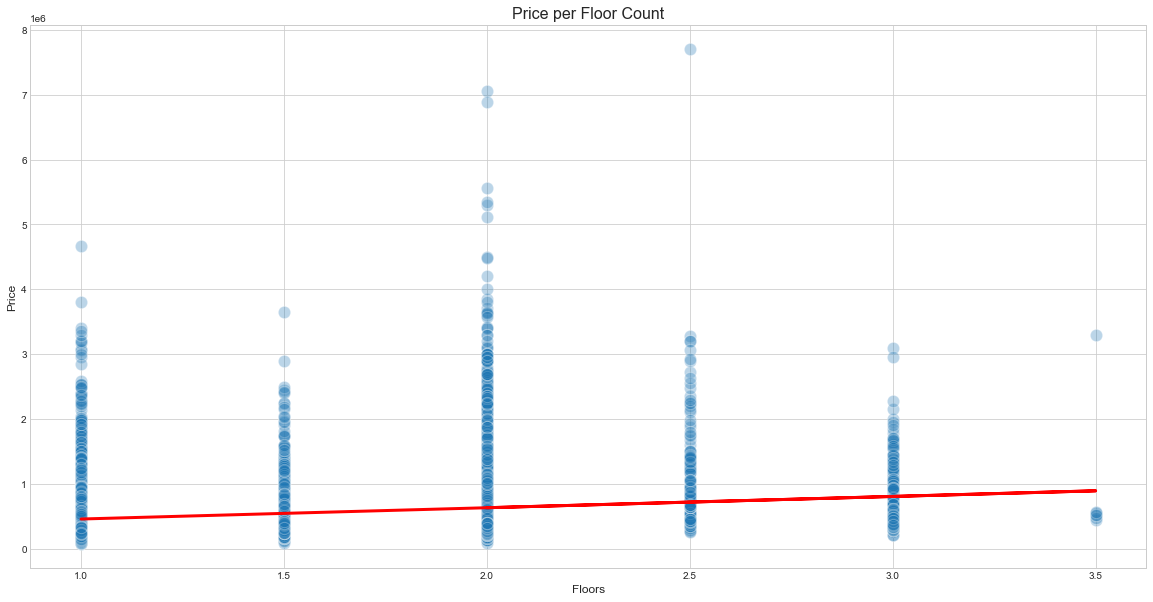

In [205]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'floors', y = 'price', data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['floors'], slr_slope*df['floors'] + slr_intercept, color = 'r', linewidth = 3)
plt.title('Price per Floor Count', fontsize = 16)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Floors', fontsize = 12)

plt.savefig('price_floors_fit.png')

In [206]:
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

R-Squared : 0.07418004909569598


In [207]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'Price_sqft'],
      dtype='object')

# MLR

In [267]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'Price_sqft'],
      dtype='object')

In [426]:
X1_var = df[['sqft_living', 'bathrooms', 'bedrooms', 'condition']]
y_var = df['price']

In [421]:
sm_X1_var = sm.add_constant(X1_var)

mlr_model = sm.OLS(y_var, sm_X1_var)
mlr_reg = mlr_model.fit()

In [422]:
print(mlr_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     5730.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:01:47   Log-Likelihood:            -2.9958e+05
No. Observations:               21597   AIC:                         5.992e+05
Df Residuals:                   21592   BIC:                         5.992e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.969e+04   9610.200     -5.170      

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X1_var, y_var, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

In [424]:
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

R-Squared : 0.5096375727946221


/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


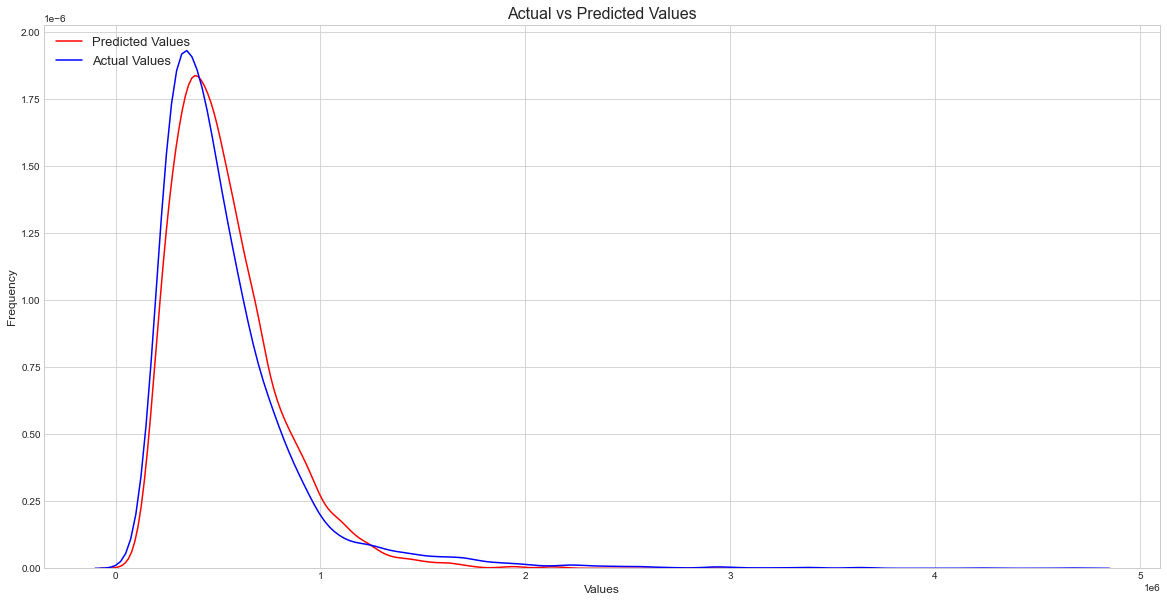

In [425]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

In [428]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

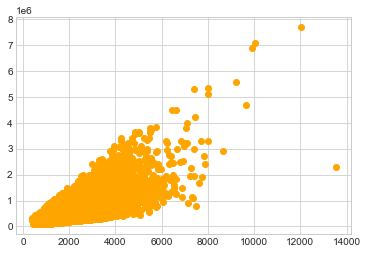

In [430]:
x = df['sqft_living']
y = df['price']

plt.plot(x, y, 'o', color='orange');